In [83]:
# Importing the necessary libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
Comm_infra = pd.read_csv('communication_infrastructure.csv')

In [3]:
# Load the first few rows of the dataset
Comm_infra.head()

,Year,Country,Broadband Subscribers / 100 ppl,Cell Phones per 100 People
0,2006,Afghanistan,0.00193,9.73
1,2006,Albania,NaN,62.50
2,2006,Algeria,0.50300,62.20
3,2006,Andorra,18.00000,85.20
4,2006,Angola,0.03680,15.10


In [4]:
# For more infomation about the dataset
Comm_infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2304 non-null   int64  
 1   Country                          2304 non-null   object 
 2   Broadband Subscribers / 100 ppl  2144 non-null   float64
 3   Cell Phones per 100 People       2253 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 72.1+ KB


In [27]:
# Rename some columns in the dataset
Comm_infra.rename(columns = {'Broadband Subscribers / 100 ppl' : 'Broadband_Subscribers / 100_ppl',
                            'Cell Phones per 100 People' : 'Cell_Phones_per_100_People'}, inplace=True)

In [29]:
# Check for missing values
Comm_infra.isna().sum()

Year                                 0
Country                              0
Broadband_Subscribers / 100_ppl    160
Cell_Phones_per_100_People          51
dtype: int64

In [ ]:
# Filling the missing values
Comm_infra['Broadband_Subscribers / 100_ppl'].fillna(Comm_infra['Broadband_Subscribers / 100_ppl'].mean(), inplace=True)
Comm_infra['Cell_Phones_per_100_People'].fillna(Comm_infra['Cell_Phones_per_100_People'].mean(), inplace=True)

In [31]:
# Recheck for missing values
Comm_infra.isna().sum()

Year                               0
Country                            0
Broadband_Subscribers / 100_ppl    0
Cell_Phones_per_100_People         0
dtype: int64

In [32]:
# Check for duplicates
Comm_infra.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2299    False
2300    False
2301    False
2302    False
2303    False
Length: 2304, dtype: bool

In [33]:
Comm_infra.head()

,Year,Country,Broadband_Subscribers / 100_ppl,Cell_Phones_per_100_People
0,2006,Afghanistan,0.001930,9.73
1,2006,Albania,9.995819,62.50
2,2006,Algeria,0.503000,62.20
3,2006,Andorra,18.000000,85.20
4,2006,Angola,0.036800,15.10


# ASK
## DEFINE THE PROBLEM

* How have cell phone subscriptions changed over the years globally?
* Which countries have the highest broadband penetration in the most recent year?
* Which countries have the lowest access to cell phones?
* What is the trend of broadband adoption over time?
* Which country showed the fastest growth in broadband adoption?
* Is there a correlation between broadband and cell phone penetration?
* Which countries have shown the biggest improvements in communication infrastructure from 2006 to the latest year?

# PREPARE
## GATHER AND UNDERSTAND THE DATA
* DATASET USED: communication_infrastructure.csv
* SOURCE: UPLOADED FROM WORLD BANK - WORLD DEVELOPMENT INDICATORS (WDI)
* TOOLS USED: PYTHON

# PROCESS
### INITIAL OBSERVATIONS:

* There are 2304 entries in the dataset.
* I replaced the spacing to an underscore in the columns 'Broadband_Subscribers / 100_ppl' and 'Cell_Phones_per_100_People' because an underscore is used in a python programming language instead of spacing.
* There are missing values in the columns 'Broadband_Subscribers / 100_ppl' and 'Cell_Phones_per_100_People'.
* I filled the missing values with the .mean() function because it is a numerical column.
* There are no duplicates in the dataset.

# ANALYZE AND SHARE
### ANSWERING THE QUESTIONS IN THE ASK SEGMENT

### 1. How have cell phone subscriptions changed over the years globally?
Based on the visualization below, Cell phone adoption has grown rapidly since 2006, with global averages rising from below 50 per 100 people to well over 100 per 100 in many countries.

Global Average Cell Phone Subscriptions per 100 People (by Year):
 Year
2006     53.31
2007     63.44
2008     73.53
2009     80.73
2010     86.91
2011     93.04
2012     96.84
2013    100.27
2014    102.49
2015    104.16
2016    105.17
2017    106.54
Name: Cell_Phones_per_100_People, dtype: float64


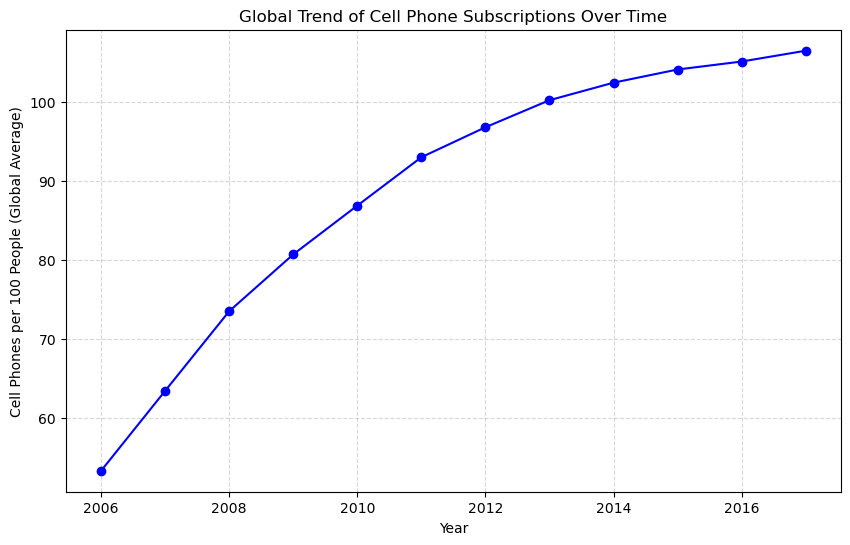

In [50]:
# Group by year: average cell phones per 100 people across all countries
global_trend = Comm_infra.groupby('Year')['Cell_Phones_per_100_People'].mean().round(2)

# Print results
print('Global Average Cell Phone Subscriptions per 100 People (by Year):\n', global_trend)

# Line plot
plt.figure(figsize=(10,6))
plt.plot(global_trend.index, global_trend.values, marker='o', color='blue')
plt.title('Global Trend of Cell Phone Subscriptions Over Time')
plt.xlabel('Year')
plt.ylabel('Cell Phones per 100 People (Global Average)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 2. Which countries have the highest broadband penetration in the most recent year?
Based on the visualization below; Monaco, Switzerland and Andorra are the top countries that have the highest broadband penetration in the year 2017 with a Broadband Subscribers of 49.8, 45.4 and 44.5 respectively.

Most recent year in dataset: 2017

Top 10 Countries by Broadband Penetration in 2017 :

          Country  Broadband_Subscribers / 100_ppl
2224       Monaco                             49.8
2278  Switzerland                             45.4
2115      Andorra                             44.5
2171       France                             43.8
2158      Denmark                             43.2
2233  Netherlands                             42.3
2217        Malta                             42.1
2267  South Korea                             41.6
2175      Germany                             40.5
2238       Norway                             40.2


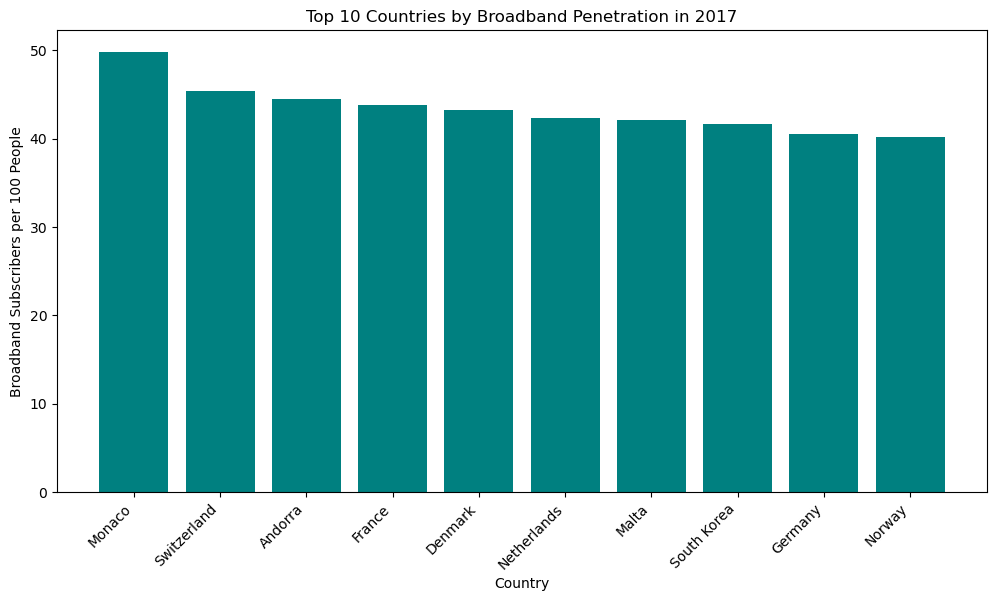

In [57]:
# Find the most recent year in the dataset
latest_year = Comm_infra['Year'].max()
print('Most recent year in dataset:', latest_year)

# Filter data for that year
latest_data = Comm_infra[Comm_infra['Year'] == latest_year]

# Sort countries by broadband subscribers per 100 people (descending)
top_broadband = latest_data.sort_values(by='Broadband_Subscribers / 100_ppl', ascending=False)

# Select top 10 countries
top10_broadband = top_broadband[['Country', 'Broadband_Subscribers / 100_ppl']].head(10)

print('\nTop 10 Countries by Broadband Penetration in', latest_year, ':\n')
print(top10_broadband)

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(top10_broadband['Country'], top10_broadband['Broadband_Subscribers / 100_ppl'], color='teal')
plt.title(f'Top 10 Countries by Broadband Penetration in {latest_year}')
plt.xlabel('Country')
plt.ylabel('Broadband Subscribers per 100 People')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Which countries have the lowest access to cell phones?
Based on the visualization below; South Sudan, Micronesia, Fe. Sts. and Madagascar are the countries that have the lowest access to cell phones.


Bottom 10 Countries by Cell Phone Access in 2017:

                    Country  Cell_Phones_per_100_People
2268            South Sudan                        12.0
2222  Micronesia, Fed. Sts.                        21.9
2212             Madagascar                        34.1
2159               Djibouti                        39.0
2199               Kiribati                        39.6
2228             Mozambique                        40.0
2155                   Cuba                        40.2
2236                  Niger                        40.9
2213                 Malawi                        41.7
2150       Congo, Dem. Rep.                        43.4


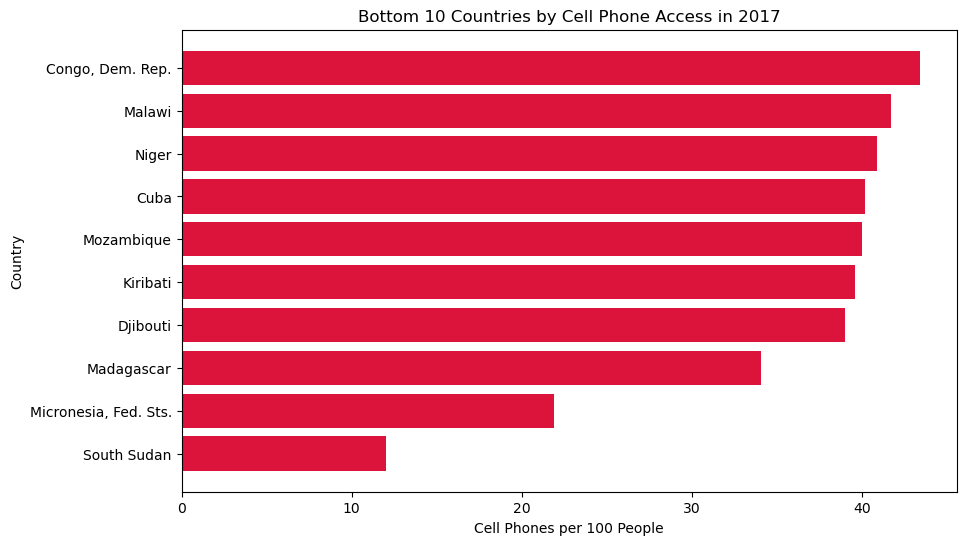

In [62]:
# Find the most recent year in the dataset
latest_year = Comm_infra['Year'].max()

# Filter for that year
latest_data = Comm_infra[Comm_infra['Year'] == latest_year]

# Sort countries by cell phone subscriptions per 100 people (ascending)
lowest_cellphones = latest_data.sort_values(by='Cell_Phones_per_100_People', ascending=True)

# Select bottom 10 countries
bottom10_cellphones = lowest_cellphones[['Country', 'Cell_Phones_per_100_People']].head(10)

print(f'\nBottom 10 Countries by Cell Phone Access in {latest_year}:\n')
print(bottom10_cellphones)

# Bar plot
plt.figure(figsize=(10,6))
plt.barh(bottom10_cellphones['Country'], bottom10_cellphones['Cell_Phones_per_100_People'], color='crimson')
plt.title(f'Bottom 10 Countries by Cell Phone Access in {latest_year}')
plt.xlabel('Cell Phones per 100 People')
plt.ylabel('Country')
plt.show()

### 4. What is the trend of broadband adoption over time?
Based on the visualization below; Broadband adoption has steadily increased, though at a slower pace compared to cell phones.

Global Average Broadband Subscriptions per 100 People (by Year):
 Year
2006     6.50
2007     6.95
2008     7.71
2009     8.56
2010     9.02
2011     9.84
2012    10.37
2013    10.94
2014    11.57
2015    12.07
2016    12.70
2017    13.71
Name: Broadband_Subscribers / 100_ppl, dtype: float64


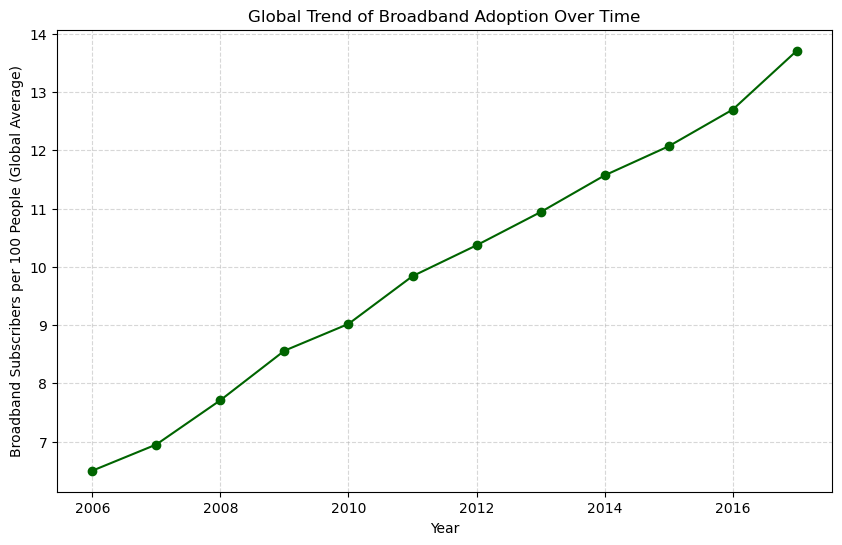

In [67]:
# Group by year: average broadband subscriptions per 100 people
broadband_trend = Comm_infra.groupby('Year')['Broadband_Subscribers / 100_ppl'].mean().round(2)

# Print values
print('Global Average Broadband Subscriptions per 100 People (by Year):\n', broadband_trend)

# Line plot
plt.figure(figsize=(10,6))
plt.plot(broadband_trend.index, broadband_trend.values, marker='o', color='darkgreen')
plt.title('Global Trend of Broadband Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Broadband Subscribers per 100 People (Global Average)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 5. Which country showed the fastest growth in broadband adoption?
Based on the visualization below, Belarus is the country that showed the fastest growth in broadband adoption with a broadband growth of 33.28


Top 10 Countries with Fastest Broadband Growth (2006 → 2017):

         Country  broadband_growth
15       Belarus             33.28
143   San Marino             32.40
65        Greece             29.59
105        Malta             29.10
44        Cyprus             28.78
3        Andorra             26.50
184      Uruguay             24.30
59        France             23.20
35         China             23.07
122  New Zealand             22.40


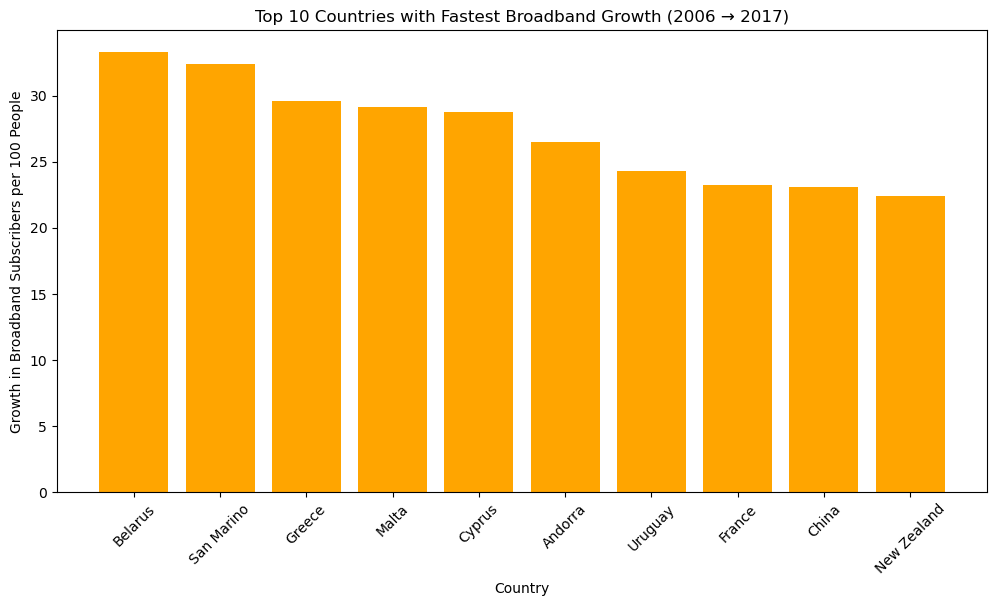

In [70]:
# Find earliest and latest year
earliest_year = Comm_infra['Year'].min()
latest_year = Comm_infra['Year'].max()

# Filter for earliest and latest year
earliest = Comm_infra[Comm_infra['Year'] == earliest_year][['Country', 'Broadband_Subscribers / 100_ppl']]
latest = Comm_infra[Comm_infra['Year'] == latest_year][['Country', 'Broadband_Subscribers / 100_ppl']]

# Merge on country
growth = pd.merge(earliest, latest, on='Country', suffixes=('_earliest', '_latest'))

# Compute growth
growth['broadband_growth'] = growth['Broadband_Subscribers / 100_ppl_latest'] - growth['Broadband_Subscribers / 100_ppl_earliest']

# Top 10 countries by growth
top10_growth = growth.sort_values(by='broadband_growth', ascending=False).head(10).round(2)

print(f'\nTop 10 Countries with Fastest Broadband Growth ({earliest_year} → {latest_year}):\n')
print(top10_growth[['Country', 'broadband_growth']])

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(top10_growth['Country'], top10_growth['broadband_growth'], color='orange')
plt.title(f'Top 10 Countries with Fastest Broadband Growth ({earliest_year} → {latest_year})')
plt.xlabel('Country')
plt.ylabel('Growth in Broadband Subscribers per 100 People')
plt.xticks(rotation=45)
plt.show()

### 6. Is there a correlation between broadband and cell phone penetration?
Based on the visualization below, there is a positive correlation: countries with high cell phone adoption usually also have higher broadband penetration.

                                     Year  Broadband_Subscribers / 100_ppl  \
Year                             1.000000                         0.189900   
Broadband_Subscribers / 100_ppl  0.189900                         1.000000   
Cell_Phones_per_100_People       0.380519                         0.473901   

                                 Cell_Phones_per_100_People  
Year                                               0.380519  
Broadband_Subscribers / 100_ppl                    0.473901  
Cell_Phones_per_100_People                         1.000000  


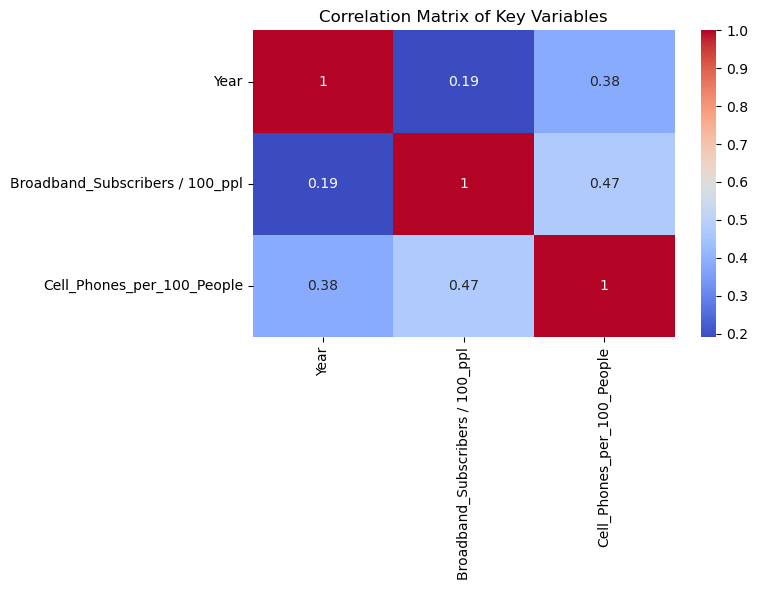

In [ ]:
# Select only numeric columns for correlation analysis
numeric_cols = Comm_infra[['Year', 'Broadband_Subscribers / 100_ppl', 'Cell_Phones_per_100_People']]

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

print(correlation_matrix)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

### 7. Which countries have shown the biggest improvements in communication infrastructure from 2006 to the latest year?
Based on the visualization; Countries like Costa Rica, Indonesia and Maldives show the largest absolute gains in both cell phones and broadband.


Top 10 Countries with Biggest Communication Infrastructure Improvements (2006 → 2017):

         Country  cell_growth  broadband_growth  total_growth
40    Costa Rica       146.50         13.270000    159.770000
76     Indonesia       146.20          2.205400    148.405400
103     Maldives       123.20          6.330000    129.530000
120        Nepal       118.54          9.992109    128.532109
62       Georgia       107.60         19.092000    126.692000
170     Thailand       115.00         10.540000    125.540000
188      Vietnam       103.80         11.193000    114.993000
171  Timor-Leste       114.32          0.255230    114.575230
158    Sri Lanka       107.50          5.734000    113.234000
148   Seychelles        98.50         13.340000    111.840000


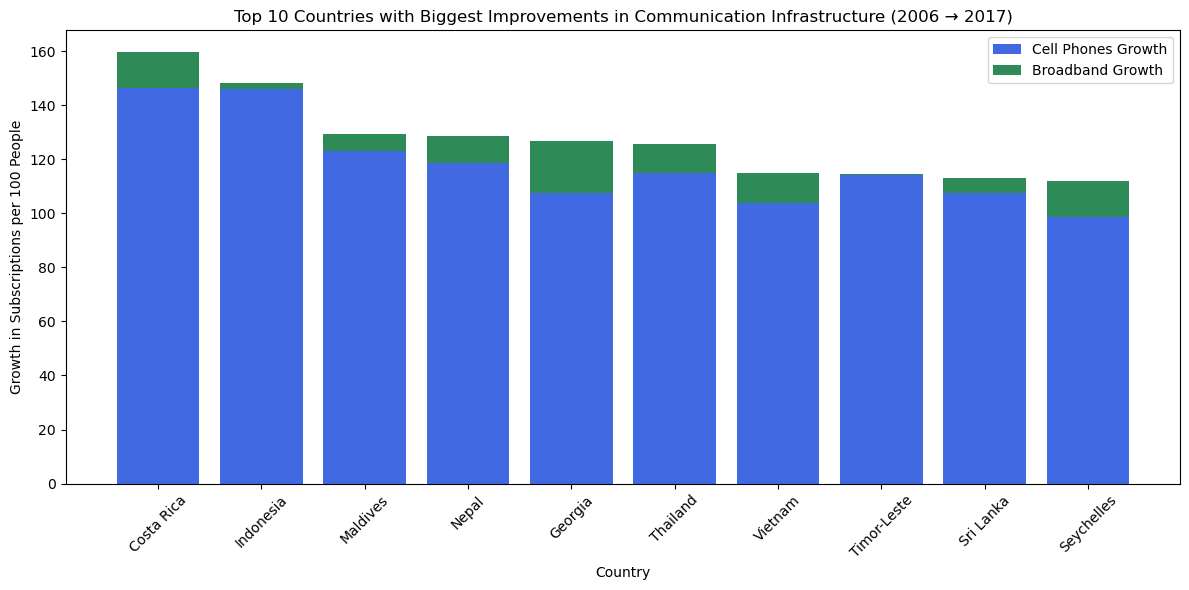

In [82]:
# Identify earliest and latest years
earliest_year = Comm_infra['Year'].min()
latest_year = Comm_infra['Year'].max()

# Filter data for those years
earliest = Comm_infra[Comm_infra['Year'] == earliest_year][['Country', 'Cell_Phones_per_100_People', 'Broadband_Subscribers / 100_ppl']]
latest = Comm_infra[Comm_infra['Year'] == latest_year][['Country', 'Cell_Phones_per_100_People', 'Broadband_Subscribers / 100_ppl']]

# Merge datasets
growth = pd.merge(earliest, latest, on='Country', suffixes=('_earliest', '_latest'))

# Compute improvements
growth['cell_growth'] = growth['Cell_Phones_per_100_People_latest'] - growth['Cell_Phones_per_100_People_earliest']
growth['broadband_growth'] = growth['Broadband_Subscribers / 100_ppl_latest'] - growth['Broadband_Subscribers / 100_ppl_earliest']
growth['total_growth'] = growth['cell_growth'] + growth['broadband_growth']

# Select top 10 by total growth
top10_growth = growth.sort_values(by='total_growth', ascending=False).head(10)

print(f'\nTop 10 Countries with Biggest Communication Infrastructure Improvements ({earliest_year} → {latest_year}):\n')
print(top10_growth[['Country', 'cell_growth', 'broadband_growth', 'total_growth']])

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(top10_growth['Country'], top10_growth['cell_growth'], label='Cell Phones Growth', color='royalblue')
plt.bar(top10_growth['Country'], top10_growth['broadband_growth'], bottom=top10_growth['cell_growth'], label='Broadband Growth', color='seagreen')

plt.title(f'Top 10 Countries with Biggest Improvements in Communication Infrastructure ({earliest_year} → {latest_year})')
plt.xlabel('Country')
plt.ylabel('Growth in Subscriptions per 100 People')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ACT
## INSIGHTS

1. Since 2006, cell phone subscriptions skyrocketed worldwide.
2. Broadband subscriptions have grown, but not nearly as fast as mobile.
3. Developed nations (Monaco, Switzerland, Andorra, France, Denmark) enjoy high broadband & mobile adoption.
4. Developing nations (especially South Sudan) still lag, though mobile adoption is improving faster than broadband.
5. Countries such as Belarus, San Marino, Greece, Malta and Cyprus lead with very high broadband penetration.
6. Countries with higher mobile adoption often also show higher broadband adoption.
7. Emerging economies like countries like Costa Rica, Indonesia and Maldives show the largest absolute gains in both cell phones and broadband.

## RECOMMENDATIONS
### SUGGESTIONS TO IMPROVE COMMUNICATION INFRASTRUCTURE

1. Developed countries should focus on quality upgrades (5G, fiber, faster speeds).
2. Developing countries should focus on affordable internet access and mobile-first solutions like mobile banking, e-learning, and telemedicine.
3. Governments should provide support and subsidies for rural areas to expand broadband access.
4. Digital literacy programs are needed so people can make full use of the internet

## CONCLUSION

This dataset shows how the world has become more connected over time. Mobile phones are everywhere, while broadband is growing but not equally across countries. Some countries enjoy very fast internet, while others still struggle with access. This means there is still a digital gap between countries, but mobile technology is helping to slowly close that gap and giving millions of people a way to connect to the digital world.